# <b> DT</b>

In [ ]:
#please use below code to load glove vectors 
import pickle
with open('Downloads/applied ai/9_Donors_choose_DT/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
ss_3.keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

<h1> Decision Tree </h1>

## 1.1 Loading Data

In [ ]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas as pd
import numpy as np
data = pd.read_csv('Downloads/applied ai/9_Donors_choose_DT/preprocessed_data.csv')
#data=data[:1000]

In [ ]:
from tqdm import tqdm
sentiment={'neg':[],'neu':[],'pos':[],'compound':[]}
for i in tqdm(data['essay'].values):
  temp=sid.polarity_scores(i)
  sentiment['neg'].append(temp['neg'])
  sentiment['neu'].append(temp['neu'])
  sentiment['pos'].append(temp['pos'])
  sentiment['compound'].append(temp['compound'])

100%|██████████| 109248/109248 [02:21<00:00, 770.63it/s]


In [ ]:
print("number of cloumns in the data set is  {}".format(len(data.columns)))

number of cloumns in the data set is  9


In [ ]:
sentiment=pd.DataFrame(sentiment)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_f=pd.concat([data,sentiment],axis=1)

In [ ]:
print("number of cloumns in the final data set is {}".format(len(data_f.columns)))

number of cloumns in the final data set is 13


In [ ]:
Y=data_f.pop('project_is_approved') 

In [ ]:
X=data_f.values 
Y=Y.values

In [ ]:
print("shapes x={} , y={} ".format(X.shape,Y.shape)) 

shapes x=(109248, 12) , y=(109248,) 


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data_f,Y,random_state=42,stratify=Y) #spliting data

In [ ]:
print("x_train and y_train shapes: {} {}".format(x_train.shape,y_train.shape))
print("x_test and y_test shapes: {} {}".format(x_test.shape,y_test.shape))

x_train and y_train shapes: (81936, 12) (81936,)
x_test and y_test shapes: (27312, 12) (27312,)


TFIDF 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer        #tfidf vectorization
tfidf_model=TfidfVectorizer()
x_train_essay=tfidf_model.fit_transform(x_train['essay'].values)
x_test_essay=tfidf_model.transform(x_test['essay'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

/home/ubuntu/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_essay.shape,x_test_essay.shape

((81936, 50440), (27312, 50440))

tfidf w2v

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
x_train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_tfidf_w2v_vectors.append(vector)
print()
print(len(x_train_tfidf_w2v_vectors))
print(len(x_train_tfidf_w2v_vectors[0]))

100%|██████████| 81936/81936 [02:26<00:00, 559.69it/s]


81936
300


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
x_test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_tfidf_w2v_vectors.append(vector)
print()
print(len(x_test_tfidf_w2v_vectors))
print(len(x_test_tfidf_w2v_vectors[0]))

100%|██████████| 27312/27312 [00:48<00:00, 565.17it/s]


27312
300


In [ ]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().
'''teacher_prefix
project_grade_category
school_state
clean_categories
clean_subcategories'''

'teacher_prefix\nproject_grade_category\nschool_state\nclean_categories\nclean_subcategories'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#return transformed train and test                                #one hot encoding for categotical features
def categorical_features(data,data1):
  vectorizer=CountVectorizer(binary=True)
  vectorizer.fit(data)
  return vectorizer.transform(data),vectorizer.transform(data1)

teacher_prefix

In [ ]:
teacher_prefix_train,teacher_prefix_test=categorical_features(x_train['teacher_prefix'],x_test['teacher_prefix'])
print('After Vectorization shape')
print(teacher_prefix_train.shape,teacher_prefix_test.shape)

After Vectorization shape
(81936, 5) (27312, 5)


project_grade

In [ ]:
project_grade_category_train,project_grade_category_test=categorical_features(x_train['project_grade_category'],x_test['project_grade_category'])
print('After Vectorization shape')
print(project_grade_category_train.shape,project_grade_category_test.shape)

After Vectorization shape
(81936, 4) (27312, 4)


school_state

In [ ]:
school_state_train,school_state_test=categorical_features(x_train['school_state'],x_test['school_state'])
print('After Vectorization shape')
print(school_state_train.shape,school_state_test.shape)

After Vectorization shape
(81936, 51) (27312, 51)


clean_categories

In [ ]:
clean_categories_train,clean_categories_test=categorical_features(x_train['clean_categories'],x_test['clean_categories'])
print('After Vectorization shape')
print(clean_categories_train.shape,clean_categories_test.shape)

After Vectorization shape
(81936, 9) (27312, 9)


clean_subcategories

In [ ]:
clean_subcategories_train,clean_subcategories_test=categorical_features(x_train['clean_subcategories'],x_test['clean_subcategories'])
print('After Vectorization shape')
print(clean_subcategories_train.shape,clean_subcategories_test.shape)

After Vectorization shape
(81936, 30) (27312, 30)


**Numeric features**

 price

In [ ]:
#x_train['price'].values.reshape(-1,1)    # not normalizing data , because DT not use distances

teacher_number_of_previously_posted_projects

In [ ]:
x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) # not normalizing data , because DT not use distances 
                                                                             #reshaping for hstack

array([[ 0],
       [19],
       [ 0],
       ...,
       [ 1],
       [ 3],
       [15]])

set 1 - categorical, numerical features + preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)

In [ ]:
from scipy.sparse import hstack

In [ ]:
x_train_set1=hstack([teacher_prefix_train,project_grade_category_train,school_state_train,clean_categories_train,clean_subcategories_train,x_train['price'].values.reshape(-1,1),x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),x_train_essay,x_train['pos'].values.reshape(-1,1),x_train['neg'].values.reshape(-1,1),x_train['neu'].values.reshape(-1,1),x_train['compound'].values.reshape(-1,1)])
x_test_set1=hstack([teacher_prefix_test,project_grade_category_test,school_state_test,clean_categories_test,clean_subcategories_test,x_test['price'].values.reshape(-1,1),x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),x_test_essay,x_test['pos'].values.reshape(-1,1),x_test['neg'].values.reshape(-1,1),x_test['neu'].values.reshape(-1,1),x_test['compound'].values.reshape(-1,1)])

In [ ]:
x_train_set1.shape,x_test_set1.shape

((81936, 50545), (27312, 50545))

Set 2: categorical, numerical features + preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)

In [ ]:
x_train_set2=hstack([teacher_prefix_train,project_grade_category_train,school_state_train,clean_categories_train,clean_subcategories_train,x_train['price'].values.reshape(-1,1),x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),x_train_tfidf_w2v_vectors,x_train['pos'].values.reshape(-1,1),x_train['neg'].values.reshape(-1,1),x_train['neu'].values.reshape(-1,1),x_train['compound'].values.reshape(-1,1)])
x_test_set2=hstack([teacher_prefix_test,project_grade_category_test,school_state_test,clean_categories_test,clean_subcategories_test,x_test['price'].values.reshape(-1,1),x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),x_test_tfidf_w2v_vectors,x_test['pos'].values.reshape(-1,1),x_test['neg'].values.reshape(-1,1),x_test['neu'].values.reshape(-1,1),x_test['compound'].values.reshape(-1,1)])

In [ ]:
x_train_set2.shape,x_test_set2.shape

((81936, 405), (27312, 405))

Apply Decision Tree Classifier on set-1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
paras={'max_depth':[1, 3, 10, 30],'min_samples_split':[5, 10, 100, 500]}
model1=GridSearchCV(DecisionTreeClassifier(),paras,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True)
model1.fit(x_train_set1,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
model1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [ ]:
auc_train=pd.DataFrame(data=model1.cv_results_['mean_train_score'].reshape(4,4),columns=paras['min_samples_split'],index=paras['max_depth'])
auc_test=pd.DataFrame(data=model1.cv_results_['mean_test_score'].reshape(4,4),columns=paras['min_samples_split'],index=paras['max_depth'])

[]

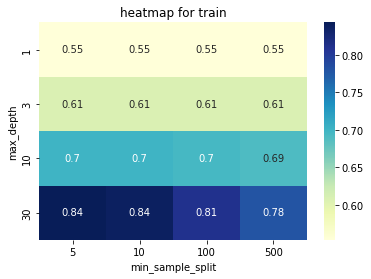

In [ ]:
import seaborn
import matplotlib.pyplot as plt
plot=seaborn.heatmap(auc_train,cmap="YlGnBu",annot=True)
plt.title('heatmap for train')
plt.xlabel('min_sample_split')
plt.ylabel('max_depth')
plt.plot()

[]

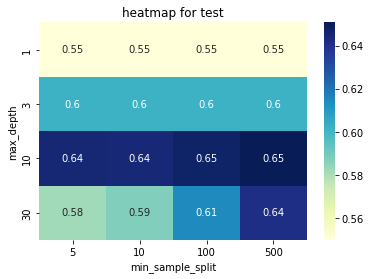

In [ ]:
import seaborn
import matplotlib.pyplot as plt
plot=seaborn.heatmap(auc_test,cmap="YlGnBu",annot=True)
plt.title('heatmap for test')
plt.xlabel('min_sample_split')
plt.ylabel('max_depth')
plt.plot()

In [ ]:
best_params=model1.best_params_

In [ ]:
best_model=DecisionTreeClassifier(max_depth=best_params['max_depth'],min_samples_split=best_params['min_samples_split'])
best_model.fit(x_train_set1,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [ ]:
train_prob=best_model.predict_proba(x_train_set1).T[1]    #taking  probablity it belogs to one,by default predict_prob gives probability for '1' and '0'
test_prob=best_model.predict_proba(x_test_set1).T[1]

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr_train,tpr_train,threshold_train=roc_curve(y_train,train_prob)  #calculating roc_curve tpr,fpr
fpr_test,tpr_test,threshold_test=roc_curve(y_test,test_prob)

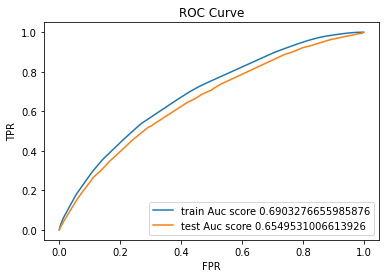

In [ ]:
plt.plot(fpr_train,tpr_train,label='train Auc score {}'.format(auc(fpr_train,tpr_train)))
plt.plot(fpr_test,tpr_test,label='test Auc score {} '.format(auc(fpr_test,tpr_test)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [ ]:
def bestthreshold(fpr,tpr,threshold):                      #best threshold ,which gives max auc
    t=threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))  
    return t

In [ ]:
def predict_with_best_t(proba, threshould):      #predicting based on best threshold
    predictions = []
    for i in proba:
       if i>=threshould:
          predictions.append(1)
       else:
          predictions.append(0)
    return predictions

In [ ]:
t=bestthreshold(fpr_train,tpr_train,threshold_train)   #best threshold ,which gives max auc
train_predict=predict_with_best_t(train_prob,t)
test_predict=predict_with_best_t(test_prob,t)              #predicting based on best threshold

the maximum value of tpr*(1-fpr) 0.4039471373846818 for threshold 0.852


In [ ]:
from sklearn.metrics import confusion_matrix           
cm_train = confusion_matrix(y_train,train_predict).T   
cm_test = confusion_matrix(y_test,test_predict).T

In [ ]:
train_df=pd.DataFrame(data=cm_train,columns=['actual -ve','actual +ve'],index=['predict -ve','predict +ve'])
test_df=pd.DataFrame(data=cm_test,columns=['actual -ve','actual +ve'],index=['predict -ve','predict +ve'])

In [ ]:
print(train_df)   #for train

             actual -ve  actual +ve
predict -ve        7670       24101
predict +ve        4736       45429


In [ ]:
print(test_df)  #for test

             actual -ve  actual +ve
predict -ve        2400        8252
predict +ve        1736       14924


In [ ]:
# 12. Find all the false positive data points
false_positive=[]
for i in range(len(train_predict)):
  if train_predict[i]==1 and y_train[i]==0:
    false_positive.append(i)

In [ ]:
len(false_positive)  #total false +ve pts

4736

In [ ]:
word_df = x_train.iloc[false_positive][['essay']]

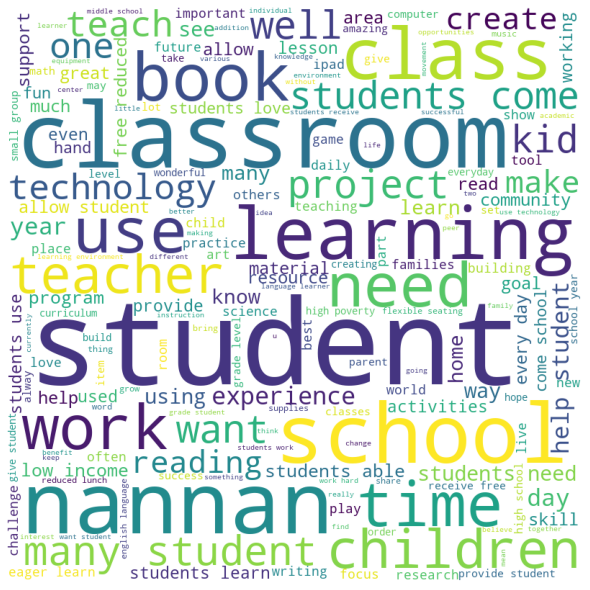

In [ ]:
#!pip install matplotlib
#!pip install pandas
#!pip install wordcloud
# Python program to generate WordCloud
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = word_df
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

/home/ubuntu/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

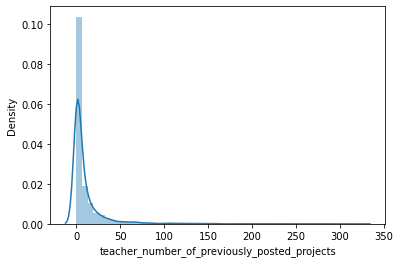

In [ ]:
# teacher_number_of_previously_posted_projects
seaborn.distplot(x_train.iloc[false_positive]['teacher_number_of_previously_posted_projects'].values)
plt.xlabel('teacher_number_of_previously_posted_projects')

/home/ubuntu/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'price')

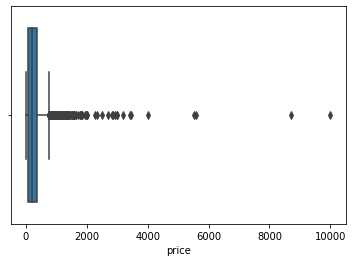

In [ ]:
seaborn.boxplot(x_train.iloc[false_positive]['price'].values)
plt.xlabel('price')

Apply Decision Tree Classifier on set-2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
paras={'max_depth':[1, 3, 10, 30],'min_samples_split':[5, 10, 100, 500]}
model2=GridSearchCV(DecisionTreeClassifier(),paras,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True)
model2.fit(x_train_set2,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
model2.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [ ]:
auc_train=pd.DataFrame(data=model2.cv_results_['mean_train_score'].reshape(4,4),columns=paras['min_samples_split'],index=paras['max_depth'])
auc_test=pd.DataFrame(data=model2.cv_results_['mean_test_score'].reshape(4,4),columns=paras['min_samples_split'],index=paras['max_depth'])

[]

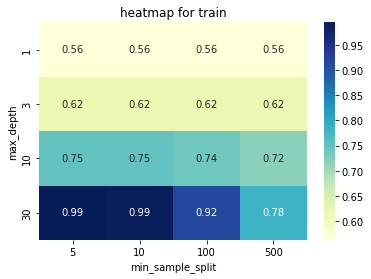

In [ ]:
import seaborn
import matplotlib.pyplot as plt
plot=seaborn.heatmap(auc_train,cmap="YlGnBu",annot=True)
plt.title('heatmap for train')
plt.xlabel('min_sample_split')
plt.ylabel('max_depth')
plt.plot()

[]

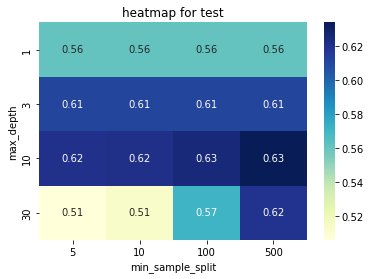

In [ ]:
import seaborn
import matplotlib.pyplot as plt
plot=seaborn.heatmap(auc_test,cmap="YlGnBu",annot=True)
plt.title('heatmap for test')
plt.xlabel('min_sample_split')
plt.ylabel('max_depth')
plt.plot()

In [ ]:
best_params=model2.best_params_

In [ ]:
best_model2=DecisionTreeClassifier(max_depth=best_params['max_depth'],min_samples_split=best_params['min_samples_split'])
best_model2.fit(x_train_set2,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [ ]:
train_prob=best_model2.predict_proba(x_train_set2).T[1]
test_prob=best_model2.predict_proba(x_test_set2).T[1]

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr_train,tpr_train,threshold_train=roc_curve(y_train,train_prob)
fpr_test,tpr_test,threshold_test=roc_curve(y_test,test_prob)

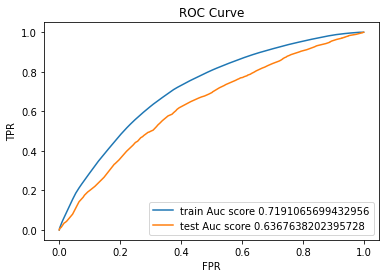

In [ ]:
plt.plot(fpr_train,tpr_train,label='train Auc score {}'.format(auc(fpr_train,tpr_train)))
plt.plot(fpr_test,tpr_test,label='test Auc score {} '.format(auc(fpr_test,tpr_test)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [ ]:
def bestthreshold(fpr,tpr,threshold):
    t=threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

In [ ]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
       if i>=threshould:
          predictions.append(1)
       else:
          predictions.append(0)
    return predictions

In [ ]:
t=bestthreshold(fpr_train,tpr_train,threshold_train)
train_predict=predict_with_best_t(train_prob,t)
test_predict=predict_with_best_t(test_prob,t)

the maximum value of tpr*(1-fpr) 0.44368967160010053 for threshold 0.859


In [ ]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train,train_predict).T
cm_test = confusion_matrix(y_test,test_predict).T

In [ ]:
train_df=pd.DataFrame(data=cm_train,columns=['actual -ve','actual +ve'],index=['predict -ve','predict +ve'])
test_df=pd.DataFrame(data=cm_test,columns=['actual -ve','actual +ve'],index=['predict -ve','predict +ve'])

In [ ]:
print(train_df)  #for train

             actual -ve  actual +ve
predict -ve        7915       21176
predict +ve        4491       48354


In [ ]:
print(test_df)  #for test

             actual -ve  actual +ve
predict -ve        2202        7579
predict +ve        1934       15597


In [ ]:
# 12. Find all the false positive data points
false_positive=[]
for i in range(len(train_predict)):
  if train_predict[i]==1 and y_train[i]==0:
    false_positive.append(i)

In [ ]:
print(len(false_positive))

4491


In [ ]:
word_df = x_train.iloc[false_positive][['essay']]

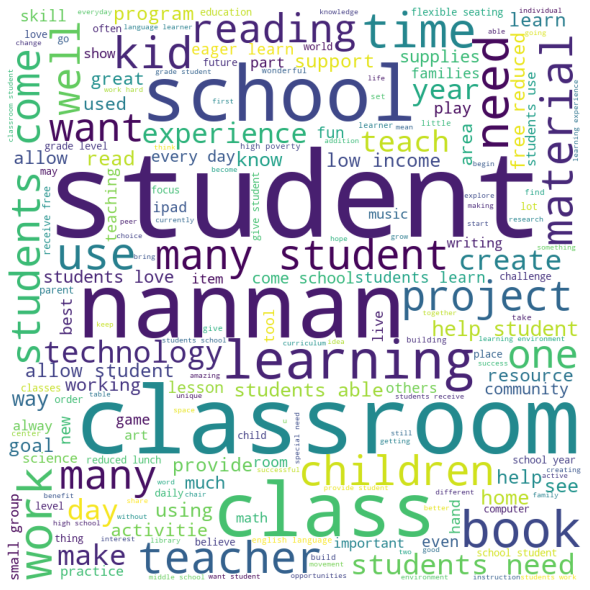

In [ ]:
#!pip install matplotlib
#!pip install pandas
#!pip install wordcloud
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = word_df
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

/home/ubuntu/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

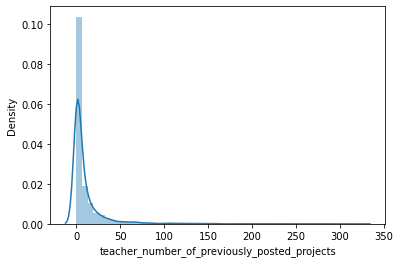

In [ ]:
# teacher_number_of_previously_posted_projects
seaborn.distplot(x_train.iloc[false_positive]['teacher_number_of_previously_posted_projects'].values)
plt.xlabel('teacher_number_of_previously_posted_projects')

/home/ubuntu/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'price')

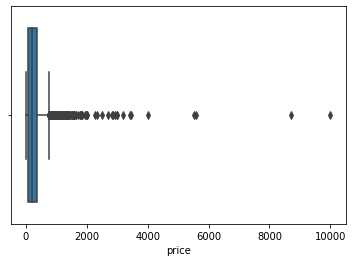

In [ ]:
seaborn.boxplot(x_train.iloc[false_positive]['price'].values)
plt.xlabel('price')

# <font color='red'> <b>model - 2</b></font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
m=DecisionTreeClassifier()   #Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None  
m.fit(x_train_set1,y_train)

DecisionTreeClassifier()

In [ ]:
m.feature_importances_.shape                           #non zero feature indexs
non_zero_index=np.argwhere(m.feature_importances_)
non_zero_index=non_zero_index.T[0]
print('non zero features are {} '.format(len(non_zero_index)))

non zero features are 3862 


In [ ]:
x_train_imp=hstack([x_train_set1.getcol(non_zero_index[0])])    
for i in non_zero_index[1:]:
    x_train_imp=hstack([x_train_imp,x_train_set1.getcol(i)])
print('x train shape : {} \n y_train shape {}'.format(x_train_imp.shape,y_train.shape)) #only non zero feature

x train shape : (81936, 3862) 
 y_train shape (81936,)


In [ ]:
x_test_imp=hstack([x_test_set1.getcol(non_zero_index[0])])
for i in non_zero_index[1:]:
    x_test_imp=hstack([x_test_imp,x_test_set1.getcol(i)])
print('x train shape : {} \n y_test shape {}'.format(x_test_imp.shape,y_test.shape))

x train shape : (27312, 3862) 
 y_test shape (27312,)


In [ ]:
non_zero_index

array([    1,     2,     5, ..., 50542, 50543, 50544])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
paras={'max_depth':[1, 3, 10, 30],'min_samples_split':[5, 10, 100, 500]}
model1=GridSearchCV(DecisionTreeClassifier(),paras,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True)
model1.fit(x_train_imp,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
model1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [ ]:
auc_train=pd.DataFrame(data=model1.cv_results_['mean_train_score'].reshape(4,4),columns=paras['min_samples_split'],index=paras['max_depth'])
auc_test=pd.DataFrame(data=model1.cv_results_['mean_test_score'].reshape(4,4),columns=paras['min_samples_split'],index=paras['max_depth'])

[]

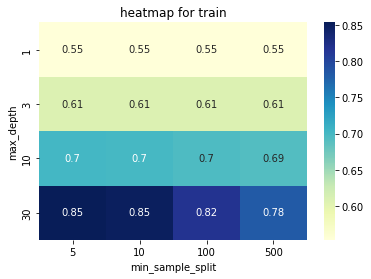

In [ ]:
import seaborn
import matplotlib.pyplot as plt
plot=seaborn.heatmap(auc_train,cmap="YlGnBu",annot=True)
plt.title('heatmap for train')
plt.xlabel('min_sample_split')
plt.ylabel('max_depth')
plt.plot()

[]

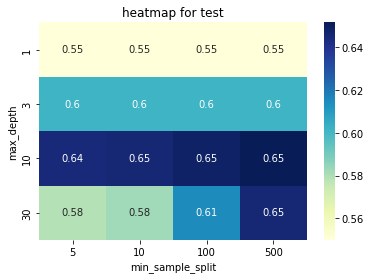

In [ ]:
import seaborn
import matplotlib.pyplot as plt
plot=seaborn.heatmap(auc_test,cmap="YlGnBu",annot=True)
plt.title('heatmap for test')
plt.xlabel('min_sample_split')
plt.ylabel('max_depth')
plt.plot()

In [ ]:
best_params=model1.best_params_

In [ ]:
best_model=DecisionTreeClassifier(max_depth=best_params['max_depth'],min_samples_split=best_params['min_samples_split'])
best_model.fit(x_train_imp,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [ ]:
train_prob=best_model.predict_proba(x_train_imp).T[1]
test_prob=best_model.predict_proba(x_test_imp).T[1]

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr_train,tpr_train,threshold_train=roc_curve(y_train,train_prob)
fpr_test,tpr_test,threshold_test=roc_curve(y_test,test_prob)

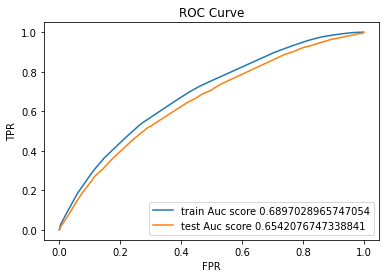

In [ ]:
plt.plot(fpr_train,tpr_train,label='train Auc score {}'.format(auc(fpr_train,tpr_train)))
plt.plot(fpr_test,tpr_test,label='test Auc score {} '.format(auc(fpr_test,tpr_test)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [ ]:
def bestthreshold(fpr,tpr,threshold):
    t=threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

In [ ]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
       if i>=threshould:
          predictions.append(1)
       else:
          predictions.append(0)
    return predictions

In [ ]:
t=bestthreshold(fpr_train,tpr_train,threshold_train)
train_predict=predict_with_best_t(train_prob,t)
test_predict=predict_with_best_t(test_prob,t)

the maximum value of tpr*(1-fpr) 0.4038329161513479 for threshold 0.852


In [ ]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train,train_predict).T
cm_test = confusion_matrix(y_test,test_predict).T

In [ ]:
train_df=pd.DataFrame(data=cm_train,columns=['actual -ve','actual +ve'],index=['predict -ve','predict +ve'])
test_df=pd.DataFrame(data=cm_test,columns=['actual -ve','actual +ve'],index=['predict -ve','predict +ve'])

In [ ]:
print(train_df) #for train

             actual -ve  actual +ve
predict -ve        7668       24102
predict +ve        4738       45428


In [ ]:
print(test_df)  #for test

             actual -ve  actual +ve
predict -ve        2400        8253
predict +ve        1736       14923


In [ ]:
# 12. Find all the false positive data points
false_positive=[]
for i in range(len(train_predict)):
  if train_predict[i]==1 and y_train[i]==0:
    false_positive.append(i)

In [ ]:
len(false_positive)

4738

In [ ]:
word_df = x_train.iloc[false_positive][['essay']]

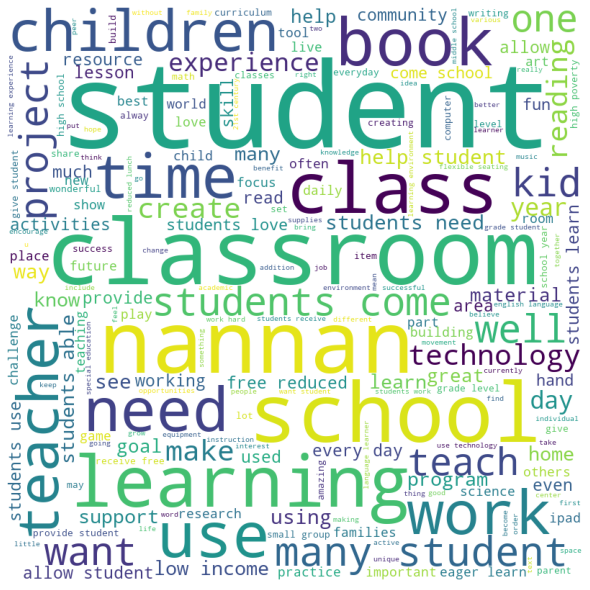

In [ ]:
#!pip install matplotlib
#!pip install pandas
#!pip install wordcloud
# Python program to generate WordCloud
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = word_df
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

/home/ubuntu/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

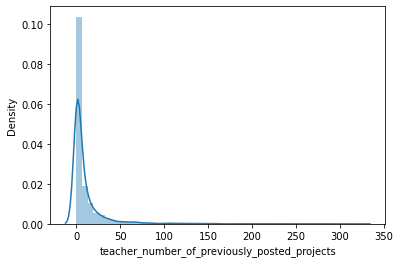

In [ ]:
# teacher_number_of_previously_posted_projects
seaborn.distplot(x_train.iloc[false_positive]['teacher_number_of_previously_posted_projects'].values)
plt.xlabel('teacher_number_of_previously_posted_projects')

/home/ubuntu/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'price')

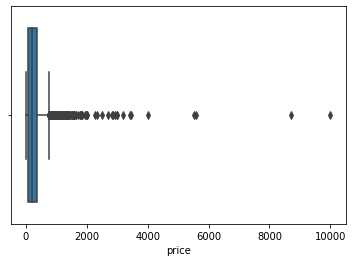

In [ ]:
seaborn.boxplot(x_train.iloc[false_positive]['price'].values)
plt.xlabel('price')

In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["model","set","hyper parameters",'AUC score'],)
# Add rows
myTable.add_row(["DT", "Set1(tfidf)", "max_depth=10 , min_sample_split=500", 0.65])
myTable.add_row(["DT", "set2(tfidfw2v)", "max_depth=10 , min_sample_split=500", 0.63])
myTable.add_row(["DT", "important features", "max_depth=10 , min_sample_split=500", 0.65])
print(myTable)

+-------+--------------------+-------------------------------------+-----------+
| model |        set         |           hyper parameters          | AUC score |
+-------+--------------------+-------------------------------------+-----------+
|   DT  |    Set1(tfidf)     | max_depth=10 , min_sample_split=500 |    0.65   |
|   DT  |   set2(tfidfw2v)   | max_depth=10 , min_sample_split=500 |    0.63   |
|   DT  | important features | max_depth=10 , min_sample_split=500 |    0.65   |
+-------+--------------------+-------------------------------------+-----------+
